In [ ]:
from traits.api import Delegate, HasTraits, Instance, Int, Str

In [ ]:
class Parent ( HasTraits ):

    # INITIALIZATION: last_name' is initialized to '':
    last_name = Str( '' )


class Child ( HasTraits ):

    age = Int

    # VALIDATION: 'father' must be a Parent instance:
    father = Instance( Parent )

    # DELEGATION: 'last_name' is delegated to father's 'last_name':
    last_name = Delegate( 'father' )

    # NOTIFICATION: This method is called when 'age' changes:
    def _age_changed ( self, old, new ):
        print 'Age changed from %s to %s ' % ( old, new )

In [ ]:
# Set up the example:
joe = Parent()
joe.last_name = 'Johnson'
moe = Child()
moe.father = joe

In [ ]:
# DELEGATION in action:
print "Moe's last name is %s " % moe.last_name

In [ ]:
# NOTIFICATION in action
moe.age = 10

In [ ]:
# VISUALIZATION: Displays a UI for editing moe's attributes
# (if a supported GUI toolkit is installed)
moe.configure_traits()

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np


#directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Data//PEEM_space_charge//'
#im = Image.open(directory + '003_BiTe_EUV_2-4kV_1500Hz_001.tif')
#
directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Simulations//TraitsMatplotlibWidget//Test//'
im = Image.open(directory + 'test.png')


#draw = ImageDraw.Draw(im)
#draw.line((0, 0) + im.size, fill=128)
#draw.line((0, im.size[1], im.size[0], 0), fill=128)
#del draw

width = im.size[0]
height = im.size[1]
print width
print height

image = np.array(im.getdata())[:,0].reshape(height,width)
plt.imshow(image)
#plt.pcolormesh(image)
plt.colorbar()
plt.show()

In [ ]:
# create the data points for the line
#x1,x2 = 290,410 
#y1,y2 =290,300
x1,x2 = 120,500 
y1,y2 =400,1
t = np.arange(0,1,1e-3)
x = x1+(x2-x1)*t
y = y1+(y2-y1)*t
#grid_x, grid_y = np.meshgrid(x,y)
#grid_x, grid_y = grid_x.T, grid_y.T

In [ ]:
# data points at which to interpolate
xx = [[i] for i in x]
yy = [[i] for i in y]
x_i = np.concatenate((yy,xx), axis = 1)
x_i.shape

In [ ]:
# calculate the distance vector
def get_dist_vec(points):
    x = []
    for i in range(0,len(points)):
        diff = points[i]-points[0]
        dist = np.sqrt(diff[0]**2 + diff[1]**2)
        x.append(dist)
    return x

In [ ]:
# make points of the image
list_y, list_x =range(1,height+1,1), range(1,width+1,1) 
points = np.array([[i,j] for i in list_y for j in list_x])
points.shape

In [ ]:
# values at points
values = image.flatten()

In [ ]:
import time
from scipy.interpolate import griddata
start = time.time()
image_interpolated = griddata(points, values, x_i, method='nearest')
end = time.time()
'The interpolation took {} s.'.format(end-start)

In [ ]:
x_vec = get_dist_vec(x_i)
plt.plot(x_vec,image_interpolated)
plt.show()

In [ ]:
plt.imshow(image)
plt.colorbar()
plt.plot(x,y)
plt.show()

Interpolation with RectBivariateSpline

In [ ]:
import time
from scipy.interpolate import RectBivariateSpline
start = time.time()
f = RectBivariateSpline(list_y,list_x,image)
image_interpolated = f(y,x)
end = time.time()
'The interpolation took {} s.'.format(end-start)

In [ ]:
length = image_interpolated.shape[0]
# get the diagonal 
coord = range(0, length, 1)

In [ ]:
plt.plot(image_interpolated[coord, coord])
plt.show()

In [ ]:
plt.imshow(image_interpolated)
plt.colorbar()
#plt.plot(x,y)
plt.show()

Interpolation with interp2d

In [ ]:
from scipy import interpolate
start = time.time()
f = interpolate.interp2d(list_x, list_y, image, kind='cubic')
image_interpolated = f(x,y)
end = time.time()
print end-start

In [ ]:
len_x = image_interpolated.shape[0]
len_y = image_interpolated.shape[1]
# get the diagonal 
x_coord = range(1, len_x, 1)
y_coord = range(1, len_y, 1)

In [ ]:
plt.plot(image_interpolated[x_coord, y_coord])
plt.show()

In [ ]:
plt.imshow(image_interpolated)
plt.colorbar()
#plt.plot(x,y)
plt.show()

Generate test edge

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ones = np.ones(100)
slope = np.arange(0,1,0.2)
slope_rev = list(reversed(slope))
y = np.concatenate((0*ones,slope,ones,slope_rev,0*ones))
x_err = np.arange(0,np.shape(y)[0],1)

In [3]:
sigma = 7e-2
y_err = np.random.normal(0,sigma,np.shape(y)[0])+y

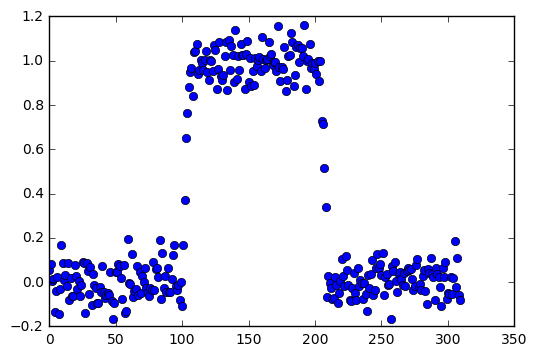

In [4]:
plt.plot(x_err,y_err, 'ob')
plt.show()

In [5]:
# divide the data 
length = len(x_err)
x_mid = int((x_err[length-1]+x_err[0])/2.0)
mid_index = list(x_err).index(x_mid)
print mid_index

154


In [6]:
y_err_left = y_err[0:mid_index-1]
x_left = x_err[0:mid_index-1]
y_err_right = y_err[mid_index:length-1]
x_right = x_err[mid_index:length-1]

102.458481472


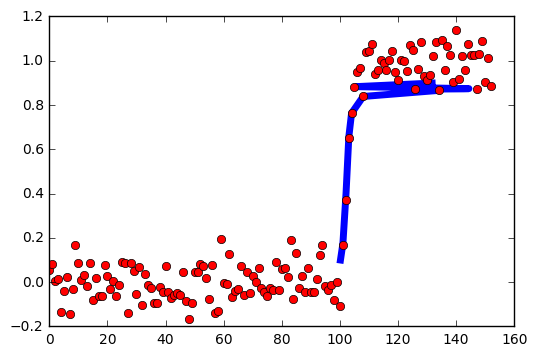

In [7]:
# interpolate
from scipy import interpolate
f = interpolate.interp1d(y_err_left[99:150], x_left[99:150],kind='linear')
y_new = np.arange(0.1, 0.9, 1e-3)
plt.plot(f(y_new), y_new, linewidth = 5 )
plt.plot(x_left, y_err_left, 'or')
print f(0.5)

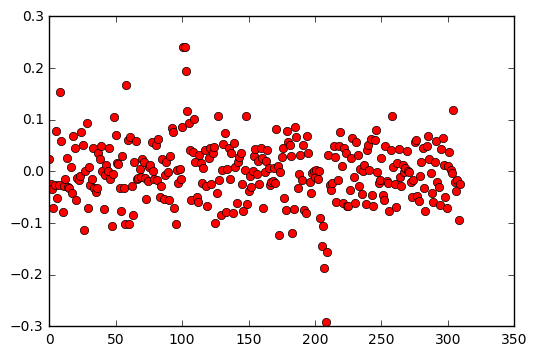

In [8]:
# differentiate the data
#x = np.arange(0,np.pi,1e-2) 
#f = np.sin(x)
#f_grad = np.gradient(f, 1e-2)
#plt.plot(x,f_grad, 'or')
#plt.plot(x,f, 'ob')

y_err_deriv = np.gradient(y_err, 1)
plt.plot(x_err,y_err_deriv, 'or')
#plt.plot(x, y_err, 'ob')

(array([  69.,  117.,   17.,    1.,    1.,    1.,    4.,   10.,   63.,   27.]),
 array([-0.16530856, -0.03250764,  0.10029327,  0.23309419,  0.3658951 ,
         0.49869602,  0.63149694,  0.76429785,  0.89709877,  1.02989968,
         1.1627006 ]),
 <a list of 10 Patch objects>)

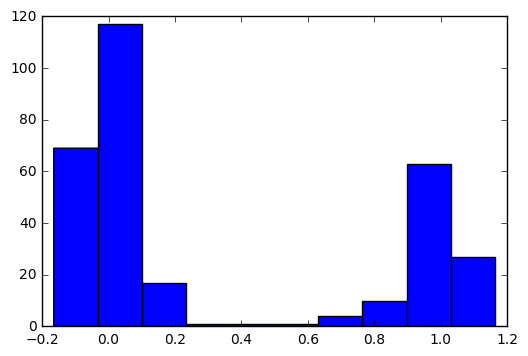

In [9]:
plt.hist(y_err)

Find cluster with KMeans

In [10]:
from sklearn.cluster import KMeans

data = y_err.reshape(-1,1)
kmeans = KMeans(n_clusters = 2).fit(data)
labels = kmeans.labels_
print labels
print kmeans.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.00663831]
 [ 0.97773972]]


In [11]:
# label cluster in the same way  
if labels[0]==1:
    labels =[0 if elem ==1 else 1 for elem in labels]

In [12]:
cluster1_x, cluster1_y = [],[]
cluster2_x, cluster2_y = [],[]

for index, item in enumerate(labels):
    if item ==0:
        cluster1_x.append(x_err[index])
        cluster1_y.append(y_err[index])
        
    if item ==1:
        cluster2_x.append(x_err[index])
        cluster2_y.append(y_err[index])         

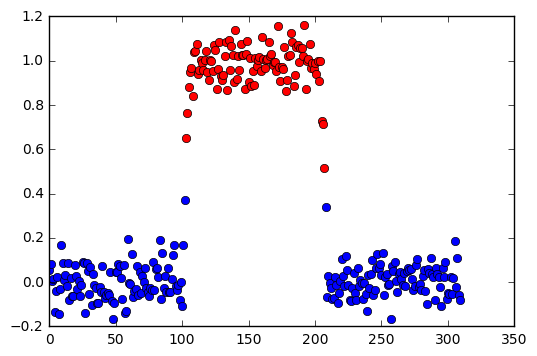

In [13]:
plt.plot(cluster1_x, cluster1_y, 'ob')
plt.plot(cluster2_x, cluster2_y, 'or')
plt.show()

Removing data outliers

In [14]:
def norm(data):
    data = np.array(data)
    print 'mean: {0}, std {1}'.format(data.mean(), data.std())
    return (data-data.mean())/data.std()

In [15]:
# remove outlier
def get_outlier_index(cluster):
    ''' :param cluster: cluster values (y values)  
        :return: index list of outliers
    '''  
    index_list = []
    cluster_norm = norm(cluster)
    for index, item in enumerate(cluster_norm):
        # item in std
        if abs(item) > 1.5:
            index_list.append(index)
    return index_list       

In [16]:
def remove_outliers(cluster, index_list):
    '''
    :param cluster: list of x, list of y values
    :param index_list: indices of values to delete
    :return: cluster without outliers
    '''
    cluster_out = []
    for data in cluster:
        data_out = np.delete(data, index_list)
        cluster_out.append(data_out)
    return cluster_out    

In [17]:
def clean_data(cluster, num_it):
    '''
    :param cluster: list of x, list of y values
    :num_it: number of iterations
    :return: cleaned cluster with outliers removed
    '''
    for i in range(0,num_it): 
        index_list = get_outlier_index(cluster[1])
        cluster_clean = remove_outliers(cluster, index_list)
        cluster = cluster_clean
    return cluster

In [23]:
cluster1 = [cluster1_x, cluster1_y]
cluster2 = [cluster2_x, cluster2_y]
cluster = [cluster1, cluster2]
for elem in cluster:
    data = clean_data(elem, 2)
    if elem == cluster1:        
        cluster1_clean_x = data[0]
        cluster1_clean_y = data[1]
    else:
        cluster2_clean_x = data[0]
        cluster2_clean_y = data[1]

mean: 0.00663830931197, std 0.0786166571616
mean: 0.00105608165209, std 0.0567139044583
mean: 0.97773972272, std 0.0975952461841
mean: 0.98800673745, std 0.063970611676


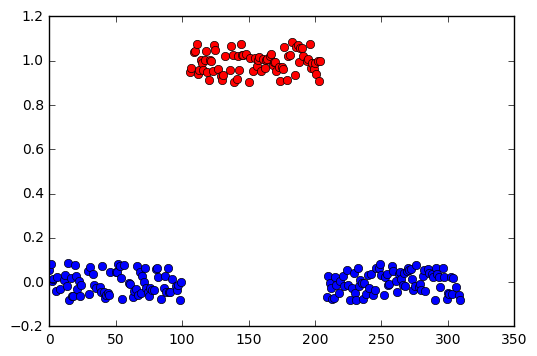

In [24]:
plt.plot(cluster1_clean_x, cluster1_clean_y, 'ob')
plt.plot(cluster2_clean_x, cluster2_clean_y, 'or')
plt.show()

In [23]:
y_1 = cluster1_clean_y.mean()
y_2 = cluster2_clean_y.mean()
y_HW = np.abs(y_1-y_2)/2.0
y_HW

0.49513991263632673

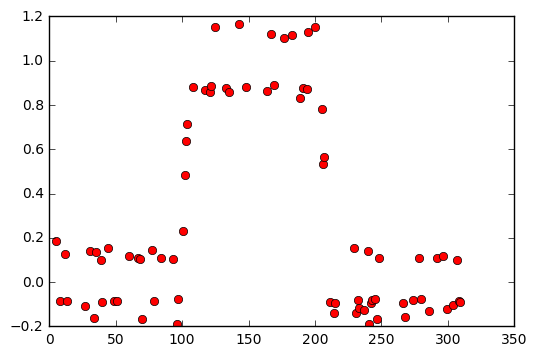

In [24]:
# difference between x,y and x_err,y_err
y = np.concatenate((np.array(cluster1_clean_y),np.array(cluster2_clean_y)))
x = np.concatenate((np.array(cluster1_clean_x),np.array(cluster2_clean_x)))

set_y = set(y)
set_x = set(x)

diff_y = [value for value in y_err if value not in set_y]
diff_x = [value for value in x_err if value not in set_x]
plt.plot(diff_x,diff_y, 'or')


In [25]:
from operator import itemgetter
def sort_and_split(x,y):
    """
    :param x: x values
    :param y: y values
    :return: sorted and splitted (by half) points, first left(x,y), then right(x,y)
    """
    x_y_sorted = sorted(zip(x,y), key = itemgetter(0))
    mid = int(len(x_y_sorted)/2.0)
    x_y_sorted_left = x_y_sorted[0:mid-1]
    x_y_sorted_right = x_y_sorted[mid:len(x_y_sorted)-1] 
    return map(list,zip(*x_y_sorted_left)), map(list,zip(*x_y_sorted_right))      

In [26]:
# sort and split the points removed by remove_outliers
points = sort_and_split(diff_x,diff_y)
x_left = points[0][0]
y_left = points[0][1]
x_right = points[1][0]
y_right = points[1][1]

102.079508431 208.220566065


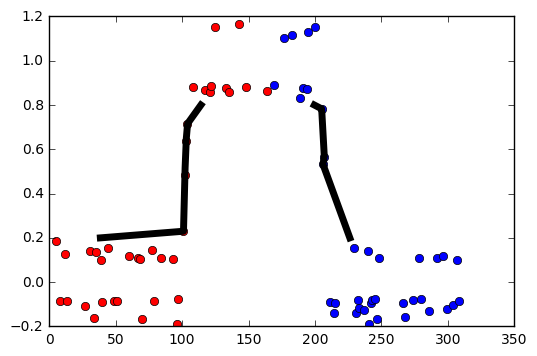

In [27]:
# interpolate
from scipy import interpolate
f_left = interpolate.interp1d(y_left, x_left,kind='linear')
f_right = interpolate.interp1d(y_right, x_right,kind='linear')
y_new = np.arange(0.2, 0.8, 1e-3)
plt.plot(x_left, y_left, 'or')
plt.plot(x_right, y_right, 'ob')
plt.plot(f_left(y_new), y_new, linewidth = 5, color = 'black')
plt.plot(f_right(y_new), y_new, linewidth = 5, color = 'black')
print f_left(y_HW), f_right(y_HW)

1. Take the mean of cluster 1 and 2 as y_min and y_max. The values for the half maximum is y_HM = (y_max-y_min)/2.
2. Bottom line: Take the index of the x value of the cleaned cluster 1 where the gap is. The x and y values in between can be used for interpolation. Top line: Take the index of the smalles and the largest x value. 
3. Interpolate x =f(y) and calculate f(y_HM) for both sides. 

Fitting

In [ ]:
from scipy.optimize import curve_fit
from scipy.special import erf
import numpy as np

def func(x,a,sigma, x_0):
    return a*erf((x-x_0)/sigma*1/np.sqrt(2))

In [ ]:
x = np.arange(-10,10,0.1)
y = func(x,10,2.5,2)+np.random.normal(0,0.5, x.shape[0])

In [ ]:
param = curve_fit(func,x,y)[0]
curve_fit(func,x,y)[1]

In [ ]:
plt.plot(x,y, 'or')
plt.plot(x,func(x,param[0], param[1], param[2]), '-b', linewidth = 2)
plt.show()

Test code 

In [ ]:
print '/*.TI/*'

In [ ]:
a = [1,2]
bool(a)
a.pop(0)
a

In [ ]:
import numpy as np
a = np.array([1,2,3])
b = np.array([3,3,3])
c = a==b
float(c.sum())/c.shape[0]

In [ ]:
c.shape[0]

In [ ]:
def find_subsequence(seq, subseq):
    target = np.dot(subseq, subseq)
    candidates = np.where(np.correlate(seq,
                                       subseq, mode='valid') == target)[0]
    # some of the candidates entries may be false positives, double check
    check = candidates[:, np.newaxis] + np.arange(len(subseq))
    mask = np.all((np.take(seq, check) == subseq), axis=-1)
    return candidates[mask]

In [ ]:
pattern = np.array([1,1,1])
array = np.array([-10,-8,1,1,1,1,2,-9,1,1])
find_subsequence(array, pattern)

In [ ]:
from operator import itemgetter
l = [(0,1),(1,4),(2,7),(1,1.5),(2,6.7),(0,0.9)]
sorted(l, key = itemgetter(0))

In [25]:
def func(a,b):
    return a+b, a-b

In [29]:
x,y = func(1,2)
print x
print y

3
-1
